In [1]:
# ----- LIBS

import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Apontando para o path do dataset da Unicamp
import os

current_path = os.getcwd()
# print(current_path)

log_path_folder = "/log_model/"
log_obst_path_folder = "/log_obstacle_model/"
okumura_path_folder = "/okumura_model/"

rssi_results_file = "rssi_results_C2T1.txt"
per_results_file  = "PER_results_C2T1.txt"

# LOG DISTANCE MODEL

In [3]:
# ----- NETWORK DATASET

path = current_path + log_path_folder + rssi_results_file
rssi_df = pd.read_csv(path, header=None) 
rssi_df.columns = ["msgId","gwId", "nodeId", "RSSI_Sim", "RSSI_Real", "distance_between"]

print(path)
print("\nSHAPE:", rssi_df.shape)
rssi_df.head(5)

/home/wasp/Desktop/Mestrado/ns3-bmap/NS3/obstacle_exp/unicamp-osm-input-to-ns3/scratch/cenarios_helder/simulation_results/log_model/rssi_results_C2T1.txt

SHAPE: (2940, 6)


,msgId,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between
0,0,1,0,-53.0772,-95.5,39.0781
1,1,1,0,-66.9553,-103.0,88.6335
2,2,1,0,-74.7587,-103.0,140.4700
3,3,1,0,-79.4452,-99.0,185.2200
4,4,1,0,-80.0730,-98.0,192.2100


In [4]:
# Obtendo os valores médios das simulações
N_simulation_repeat = 10
rssi_log_df = pd.DataFrame()

# print("range:", int(rssi_df.shape[0]/N_simulation_repeat))
for i in range(int(rssi_df.shape[0]/N_simulation_repeat)):
    df = rssi_df.query('msgId =='+ str(i))
    row = df.iloc[0:1].copy()
    row['RSSI_Sim'] = df['RSSI_Sim'].mean()
    rssi_log_df = rssi_log_df.append(row, ignore_index = True)

print("\nSHAPE:", rssi_log_df.shape)
rssi_log_df.head(5)


SHAPE: (147, 6)


,msgId,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between
0,0,1,0,-53.10935,-95.5,39.0781
1,1,1,0,-66.96155,-103.0,88.6335
2,2,1,0,-74.76120,-103.0,140.4700
3,3,1,0,-79.44660,-99.0,185.2200
4,4,1,0,-80.07430,-98.0,192.2100


In [5]:
# Calculando as métricas

N = rssi_log_df.shape[0]

# deltaY and deltaY_abs colunms
rssi_log_df['deltaY'] = rssi_log_df['RSSI_Sim'] - rssi_log_df['RSSI_Real']
rssi_log_df['deltaY_abs'] = abs(rssi_log_df['RSSI_Sim'] - rssi_log_df['RSSI_Real'])

# mean prediction error
mean_prediction_error = (1/N) * rssi_log_df['deltaY'].sum()

# mean absolute error
mean_absolute_error = (1/N) * rssi_log_df['deltaY_abs'].sum() 

# standard deviation of the prediction error
rssi_log_df['error'] = (rssi_log_df['deltaY'] - mean_absolute_error) ** 2
sd_error = math.sqrt( (1/N) * (rssi_log_df['error'].sum()) )

print("mean_prediction_error:", mean_prediction_error)
print("mean_absolute_error:", mean_absolute_error)
print("sd_error:", sd_error)

rssi_log_df.head(5)

mean_prediction_error: -1.7583428571428548
mean_absolute_error: 9.838819047619047
sd_error: 17.269568826217352


,msgId,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between,deltaY,deltaY_abs,error
0,0,1,0,-53.10935,-95.5,39.0781,42.39065,42.39065,1059.621698
1,1,1,0,-66.96155,-103.0,88.6335,36.03845,36.03845,686.420662
2,2,1,0,-74.76120,-103.0,140.4700,28.23880,28.23880,338.559299
3,3,1,0,-79.44660,-99.0,185.2200,19.55340,19.55340,94.373083
4,4,1,0,-80.07430,-98.0,192.2100,17.92570,17.92570,65.397644


# LOG + Obstacle Model

In [6]:
path = current_path + log_obst_path_folder + rssi_results_file
rssi_df = pd.read_csv(path, header=None) 
rssi_df.columns = ["msgId","gwId", "nodeId", "RSSI_Sim", "RSSI_Real", "distance_between"]

print(path)
print("\nSHAPE:", rssi_df.shape)
rssi_df.head(5)

/home/wasp/Desktop/Mestrado/ns3-bmap/NS3/obstacle_exp/unicamp-osm-input-to-ns3/scratch/cenarios_helder/simulation_results/log_obstacle_model/rssi_results_C2T1.txt

SHAPE: (2940, 6)


,msgId,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between
0,0,1,0,-53.0772,-95.5,39.0781
1,1,1,0,-66.9553,-103.0,88.6335
2,2,1,0,-74.7587,-103.0,140.4700
3,3,1,0,-79.4452,-99.0,185.2200
4,4,1,0,-80.0730,-98.0,192.2100


In [7]:
# Obtendo os valores médios das simulações
N_simulation_repeat = 10
rssi_obst_df = pd.DataFrame()

# print("range:", int(rssi_df.shape[0]/N_simulation_repeat))
for i in range(int(rssi_df.shape[0]/N_simulation_repeat)):
    df = rssi_df.query('msgId =='+ str(i))
    row = df.iloc[0:1].copy()
    row['RSSI_Sim'] = df['RSSI_Sim'].mean()
    rssi_obst_df = rssi_obst_df.append(row, ignore_index = True)

print("\nSHAPE:", rssi_obst_df.shape)
rssi_obst_df.head(5)


SHAPE: (147, 6)


,msgId,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between
0,0,1,0,-53.10935,-95.5,39.0781
1,1,1,0,-66.96155,-103.0,88.6335
2,2,1,0,-74.76120,-103.0,140.4700
3,3,1,0,-79.44660,-99.0,185.2200
4,4,1,0,-80.07430,-98.0,192.2100


In [8]:
# Calculando as métricas

N = rssi_obst_df.shape[0]

# deltaY and deltaY_abs colunms
rssi_obst_df['deltaY'] = rssi_obst_df['RSSI_Sim'] - rssi_obst_df['RSSI_Real']
rssi_obst_df['deltaY_abs'] = abs(rssi_obst_df['RSSI_Sim'] - rssi_obst_df['RSSI_Real'])

# mean prediction error
mean_prediction_error = (1/N) * rssi_obst_df['deltaY'].sum()

# mean absolute error
mean_absolute_error = (1/N) * rssi_obst_df['deltaY_abs'].sum() 

# standard deviation of the prediction error
rssi_obst_df['error'] = (rssi_obst_df['deltaY'] - mean_absolute_error) ** 2
sd_error = math.sqrt( (1/N) * (rssi_obst_df['error'].sum()) )

print("mean_prediction_error:", mean_prediction_error)
print("mean_absolute_error:", mean_absolute_error)
print("sd_error:", sd_error)

rssi_obst_df.head(5)

mean_prediction_error: -17.496496258503402
mean_absolute_error: 23.975301020408168
sd_error: 47.265788172260606


,msgId,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between,deltaY,deltaY_abs,error
0,0,1,0,-53.10935,-95.5,39.0781,42.39065,42.39065,339.125078
1,1,1,0,-66.96155,-103.0,88.6335,36.03845,36.03845,145.519563
2,2,1,0,-74.76120,-103.0,140.4700,28.23880,28.23880,18.177424
3,3,1,0,-79.44660,-99.0,185.2200,19.55340,19.55340,19.553209
4,4,1,0,-80.07430,-98.0,192.2100,17.92570,17.92570,36.597673


# Okumura

In [9]:
path = current_path + okumura_path_folder + rssi_results_file
rssi_df = pd.read_csv(path, header=None) 
rssi_df.columns = ["msgId","gwId", "nodeId", "RSSI_Sim", "RSSI_Real", "distance_between"]

print(path)
print("\nSHAPE:", rssi_df.shape)
rssi_df.head(5)

/home/wasp/Desktop/Mestrado/ns3-bmap/NS3/obstacle_exp/unicamp-osm-input-to-ns3/scratch/cenarios_helder/simulation_results/okumura_model/rssi_results_C2T1.txt

SHAPE: (2940, 6)


,msgId,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between
0,0,1,0,-50.7389,-95.5,39.0781
1,1,1,0,-65.1590,-103.0,88.6335
2,2,1,0,-73.2672,-103.0,140.4700
3,3,1,0,-78.1367,-99.0,185.2200
4,4,1,0,-78.7891,-98.0,192.2100


In [10]:
# Obtendo os valores médios das simulações
N_simulation_repeat = 10
rssi_okumura_df = pd.DataFrame()

# print("range:", int(rssi_df.shape[0]/N_simulation_repeat))
for i in range(int(rssi_df.shape[0]/N_simulation_repeat)):
    df = rssi_df.query('msgId =='+ str(i))
    row = df.iloc[0:1].copy()
    row['RSSI_Sim'] = df['RSSI_Sim'].mean()
    rssi_okumura_df = rssi_okumura_df.append(row, ignore_index = True)

print("\nSHAPE:", rssi_okumura_df.shape)
rssi_okumura_df.head(5)


SHAPE: (147, 6)


,msgId,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between
0,0,1,0,-50.49115,-95.5,39.0781
1,1,1,0,-64.74280,-103.0,88.6335
2,2,1,0,-72.76725,-103.0,140.4700
3,3,1,0,-77.58770,-99.0,185.2200
4,4,1,0,-78.23350,-98.0,192.2100


In [11]:
# Calculando as métricas

N = rssi_okumura_df.shape[0]

# deltaY and deltaY_abs colunms
rssi_okumura_df['deltaY'] = rssi_okumura_df['RSSI_Sim'] - rssi_okumura_df['RSSI_Real']
rssi_okumura_df['deltaY_abs'] = abs(rssi_okumura_df['RSSI_Sim'] - rssi_okumura_df['RSSI_Real'])

# mean prediction error
mean_prediction_error = (1/N) * rssi_okumura_df['deltaY'].sum()

# mean absolute error
mean_absolute_error = (1/N) * rssi_okumura_df['deltaY_abs'].sum() 

# standard deviation of the prediction error
rssi_okumura_df['error'] = (rssi_okumura_df['deltaY'] - mean_absolute_error) ** 2
sd_error = math.sqrt( (1/N) * (rssi_okumura_df['error'].sum()) )

print("mean_prediction_error:", mean_prediction_error)
print("mean_absolute_error:", mean_absolute_error)
print("sd_error:", sd_error)

rssi_okumura_df.head(5)

mean_prediction_error: -0.5211843537414963
mean_absolute_error: 9.756919727891157
sd_error: 16.716657494256502


,msgId,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between,deltaY,deltaY_abs,error
0,0,1,0,-50.49115,-95.5,39.0781,45.00885,45.00885,1242.698588
1,1,1,0,-64.74280,-103.0,88.6335,38.25720,38.25720,812.265976
2,2,1,0,-72.76725,-103.0,140.4700,30.23275,30.23275,419.259625
3,3,1,0,-77.58770,-99.0,185.2200,21.41230,21.41230,135.847889
4,4,1,0,-78.23350,-98.0,192.2100,19.76650,19.76650,100.191697


# Plots

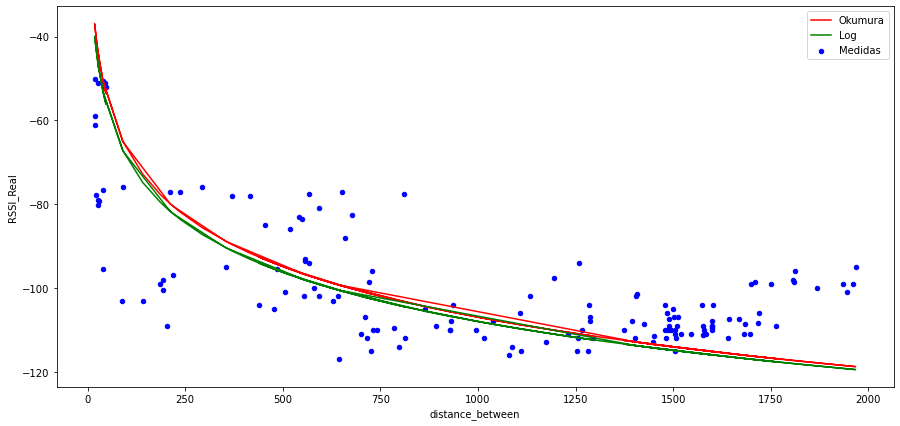

In [12]:
fig = plt.figure(figsize=(15,7))
ax = plt.gca()

# rssi_obst_df.plot(kind='line',x="distance_between", y='RSSI_Sim',label='Obstaculo', color = 'purple', ax=ax)
rssi_okumura_df.plot(kind='line',x="distance_between", y='RSSI_Sim',label='Okumura', color = 'red', ax=ax)
rssi_log_df.plot(kind='line',x="distance_between", y='RSSI_Sim',label='Log', color = 'green', ax=ax)
rssi_log_df.plot(kind='scatter',x="distance_between", y='RSSI_Real',label='Medidas', color = 'blue', ax=ax)

# plt.xlabel('Período de Teste', fontweight='bold', fontsize=14,labelpad=30)
# plt.ylabel('Nível de Enchimento (cm)', fontweight='bold', fontsize=14, labelpad=30)

# # ajust x axis datetime

# xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
# ax.xaxis.set_major_formatter(xfmt)

# ttl = ax.title
# ttl.set_position([.5, 1.04])
# plt.title('Leituras do Sensor Ultrassônico',fontweight='bold',fontsize=14)

plt.show()
fig.savefig('cenario_II.png',bbox_inches='tight')
